# FIFA World Cup - Qatar 2022

At the time of writing the 2022 World Cup is already underway, with 32 teams battling it out in Qatar for the famous golden globe. I've lost touch a bit in recent years with football, and thought it would be interesting to use Python to get back up to speed. 

The main aim of this project is to try and uncover some insights about the 32 teams - who has played it safe, and gone for experience, who has been bold and decided to give youth a chance to flourish. I'm also interested in where the players play their football at club level, and hope to quantify their geographical spread.

## Data source

The data was sourced from [Sporting News](https://www.sportingnews.com/us/soccer/news/world-cup-squads-2022-team-rosters-official-fifa-qatar/kjcagctfesjt0zpjxctbdqha) website.

## Exploratory Data Analysis

Let's dive in! 

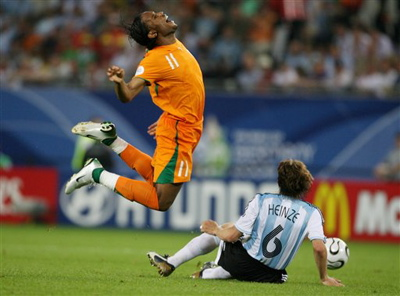

In [2]:
## Import the required packages
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib as plt

pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Load in our data
world_cup = pd.read_csv('Data/World_Cup_2022.csv')

We can automate some of the exploratory data analysis by writing a function:

In [153]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))  

In [284]:
initial_eda(world_cup)

Dimensions : 830 rows, 11 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                  Name     object          830          0
                              Position     object            4          0
                                   Age    float64           29          0
                               Country     object           32          0
                              Ctry_cap     object           32          0
                                  Caps      int64          132          0
                                 Group     object            8          0
                                  Club     object          446          0
                             Club_ctry     object           43          0
                         Club_ctry_cap     object           43          0
                             Home_Away     object            2          0


Looks like there is no missing data within the dataset. However, there are 8 groups of 4, so 32 teams competing and the maximum permitted squad size is 26, which would be 832 players. We only have 830 observations. Let's investigate this by grouping the squad numbers by country:

In [4]:
world_cup.groupby("Country")["Name"].count().sort_values(ascending=False)

Country
Argentina       26
Australia       26
Uruguay         26
USA             26
Tunisia         26
Switzerland     26
Spain           26
South Korea     26
Serbia          26
Senegal         26
Saudi Arabia    26
Qatar           26
Portugal        26
Poland          26
Netherlands     26
Morocco         26
Mexico          26
Japan           26
Ghana           26
Germany         26
England         26
Ecuador         26
Denmark         26
Croatia         26
Costa Rica      26
Canada          26
Cameroon        26
Brazil          26
Belgium         26
Wales           26
Iran            25
France          25
Name: Name, dtype: int64

Iran and France only have 25 players in their squad. On follow up this was confirmed to be correct, so we haven't lost any players! Let's move on and take a closer look at our data by looking at the first few rows:

In [6]:
# View the first 5 rows
world_cup.head()

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
0,Saad Al-Sheeb,GK,32.00,Qatar,Doha,80,A,Al-Sadd,Qatar,Doha,Home
1,Meshaal Barsham,GK,24.00,Qatar,Doha,15,A,Al-Sadd,Qatar,Doha,Home
2,Yousuf Hassan,GK,26.00,Qatar,Doha,9,A,Al-Gharafa,Qatar,Doha,Home
3,Pedro Miguel,DEF,32.00,Qatar,Doha,78,A,Al-Sadd,Qatar,Doha,Home
4,Musaab Khidir,DEF,29.00,Qatar,Doha,29,A,Al-Sadd,Qatar,Doha,Home


....and the last few rows:

In [5]:
# View the last 5 rows
world_cup.tail()

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
825,Kamaldeen Sulemana,MID,20.00,Ghana,Accra,11,H,Stade Rennes,France,Paris,Away
826,Antoine Semenyo,FWD,22.00,Ghana,Accra,1,H,Bristol City,England,London,Away
827,Andre Ayew,FWD,32.00,Ghana,Accra,107,H,Al Sadd,Qatar,Doha,Away
828,Jordan Ayew,FWD,31.00,Ghana,Accra,82,H,Crystal Palace,England,London,Away
829,Inaki Williams,FWD,28.00,Ghana,Accra,1,H,Athletic Club,Spain,Madrid,Away


OK, so we can see that we have some basic information about each player:

    - Name
    - Position (GK = Goalkeeper DEF = Defender MID = Midfielder FWD = Forward)
    - Age
    - Country they represent
    - Ctry_cap - capital of country they represent
    - Caps (Number of matches played for their country)
    - Group (32 teams divided into 8 groups A-H of 4)
    - Club (the team that pays the player's wages!)
    - Club_ctry (the location of the player's domestic team)
    - Club_ctry_cap (capital of their club country)
    - Home_Away - where they play their club football

## Numeric features

In [7]:
import numpy as np

world_cup.describe(include=(np.number))

,Age,Caps
count,830.00,830.00
mean,26.80,33.87
std,4.59,33.81
min,0.00,0.00
25%,24.00,8.00
50%,27.00,23.00
75%,30.00,47.00
max,45.00,191.00


## You can't win anything with kids

<div>
<img src="Kids.jpg" width="300"/>
</div>

It turned out of course that Alan was wrong - Manchester United went on to win the English Premier league that season. There is no master recipe for success it seems at these tournaments. Some managers like to lean on the old guard, some like to throw the gauntlet down and give the kids a chance. Let's take a look at the age profile of the players using a [***histogram***](https://en.wikipedia.org/wiki/Histogram):

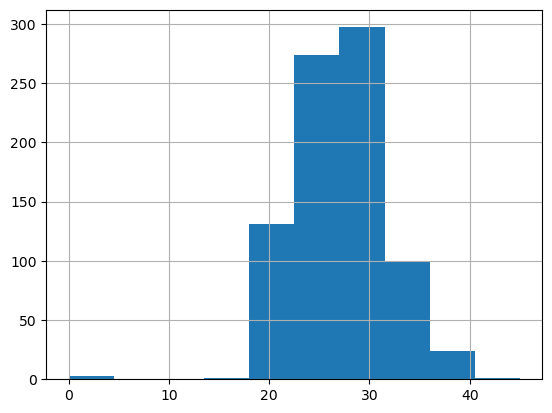

In [8]:
world_cup ['Age'].hist();

Something doesn't look right here, some ages between 0 and 5! Let's look into this. We can use  [.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) to *access* a group of rows and columns by name or [.iloc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) to access by index:

In [9]:
world_cup.loc[world_cup['Age'] <5 ]

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
34,Diego Palacios,DEF,2.00,Ecuador,Quito,11,A,LAFC,USA,"Washington, DC",Away
520,Ahmed Reda Tagnaouti,GK,3.00,Morocco,Rabat,3,F,Wydad Casablanca,Morocco,Rabat,Home
642,Fabian Rieder,MID,0.00,Switzerland,Berne,0,G,Young Boys,Switzerland,Berne,Home


On follow up, Diego Palacios Fabian Redier is 23, Ahmed Reda Tagnaouti is 26, and Fabian Rieder is 20 years old. We can correct these errors using [.iat](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iat.html). The values we wish to update are located at rows 34, 520 and 642 of column 2 - watch out, indexing starts at 0 in Python! 

In [10]:
# Update Diego Palacios age
world_cup.iat[34,2]=23

# Update Ahmed Reda Tagnaouti age
world_cup.iat[520,2]=26

# Update Fabian Rieder age
world_cup.iat[642,2]=20

Let's check that's worked:

In [11]:
world_cup.loc[34:34]

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
34,Diego Palacios,DEF,23.00,Ecuador,Quito,11,A,LAFC,USA,"Washington, DC",Away


In [12]:
world_cup.loc[520:520]

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
520,Ahmed Reda Tagnaouti,GK,26.00,Morocco,Rabat,3,F,Wydad Casablanca,Morocco,Rabat,Home


In [13]:
world_cup.loc[642:642]

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
642,Fabian Rieder,MID,20.00,Switzerland,Berne,0,G,Young Boys,Switzerland,Berne,Home


Great, the ages have been successfully updated. Let's now take a look at the age profile of each of the 32 squads:

Text(0.5, 1.0, 'Average age of squad')

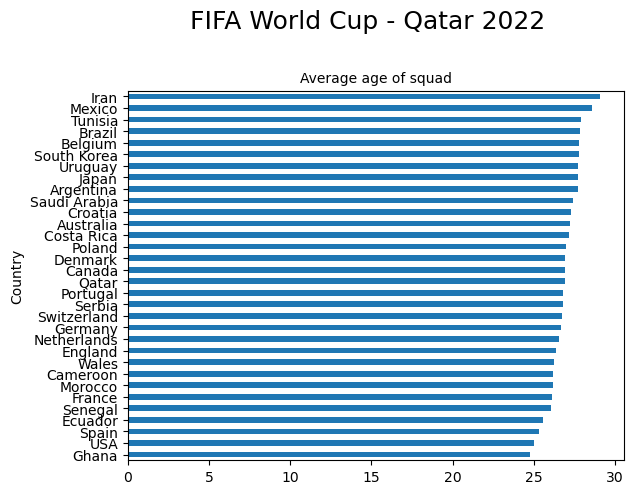

In [14]:
import matplotlib.pyplot as plt

title_string = "FIFA World Cup - Qatar 2022"
subtitle_string = "Average age of squad"

x = world_cup.groupby('Country')['Age'].mean().sort_values()
plt.figure()
x.plot(kind='barh')
plt.suptitle(title_string, y=1.05, fontsize=18)
plt.title(subtitle_string, fontsize=10)


In [15]:
ave_age = world_cup.groupby("Country")["Age"].mean()
ave_age.sort_values(ascending=False)

Country
Iran           29.08
Mexico         28.58
Tunisia        27.92
Brazil         27.86
Belgium        27.77
South Korea    27.77
Uruguay        27.73
Japan          27.69
Argentina      27.69
Saudi Arabia   27.38
Croatia        27.31
Australia      27.23
Costa Rica     27.15
Poland         27.00
Canada         26.92
Denmark        26.92
Qatar          26.92
Portugal       26.77
Serbia         26.77
Switzerland    26.73
Germany        26.69
Netherlands    26.58
England        26.35
Wales          26.23
Morocco        26.19
Cameroon       26.19
France         26.12
Senegal        26.04
Ecuador        25.54
Spain          25.31
USA            25.00
Ghana          24.73
Name: Age, dtype: float64

So Ghana and Ecaudor have the youngest squads (average age 24.73) whilst Iran has the oldest, with an average age of 29.08. 

## Out with the old

<div>
<img src="added time.jpg" width="300"/>
</div>


The players below will be looking at the board and hoping for a large number. Players are looking after themselves more and more, extending their playing careers, but realistically, for the players below, this is possibly their last opportunity to appear in a World Cup. So make sure to see catch them while you can!

In [16]:
mature = world_cup[world_cup['Age'] > 33]
mature_sorted = mature.sort_values(by="Age",ascending = False)
mature_sorted.head(10)

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
143,Ramin Rezaeian,DEF,45.00,Iran,Tehran,2,B,Sepahan,Iran,Tehran,Home
261,Alfredo Talavera,GK,40.00,Mexico,Mexico City,40,C,FC Juarez,Mexico,Mexico City,Home
440,Eiji Kawashima,GK,39.00,Japan,Tokyo,95,E,Strasbourg,France,Paris,Away
781,Pepe,DEF,39.00,Portugal,Lisbon,128,H,Porto,Portugal,Lisbon,Home
608,Atiba Hutchinson,MID,39.00,Canada,Ottawa,98,F,Besiktas,Turkey,Istanbul,Away
682,Dani Alves,DEF,39.00,Brazil,Brasilia,125,G,Pumas UNAM,Mexico,Mexico City,Away
679,Thiago Silva,DEF,38.00,Brazil,Brasilia,108,G,Chelsea,England,London,Away
78,Remko Pasveer,GK,38.00,Netherlands,Amsterdam,2,A,Ajax,Netherlands,Amsterdam,Home
340,Aymen Mathlouthi,GK,38.00,Tunisia,Tunis,73,D,Etoile du Sahel,Tunisia,Tunis,Home
365,Steve Mandanda,GK,37.00,France,Paris,34,D,Rennes,France,Paris,Home


## In with the new

In [17]:
new = world_cup[world_cup['Age'] < 20]
new_sorted = new.sort_values(by="Age",ascending = True)
new_sorted.head(10)

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
435,Youssoufa Moukoko,FWD,17.00,Germany,Berlin,1,E,Borussia Dortmund,Germany,Berlin,Home
820,Fatawu Issahaku,MID,18.00,Ghana,Accra,11,H,Sporting,Portugal,Lisbon,Away
577,Zeno Debast,DEF,18.00,Belgium,Brussels,3,F,Anderlecht,Belgium,Brussels,Home
531,Bilal El Khannouss,MID,18.00,Morocco,Rabat,0,F,Racing Genk,Belgium,Brussels,Away
505,Jewison Bennette,MID,18.00,Costa Rica,San Jose,7,E,Sunderland,England,London,Away
412,Garang Kuol,FWD,18.00,Australia,Canberra,1,D,Central Coast Mariners,Australia,Canberra,Home
478,Gavi,MID,18.00,Spain,Madrid,13,E,Barcelona,Spain,Madrid,Home
784,Antonio Silva,DEF,19.00,Portugal,Lisbon,0,H,Benfica,Portugal,Lisbon,Home
648,Simon Ngapandouetnbu,GK,19.00,Cameroon,Yaounde,0,G,Marseille,France,Paris,Away
504,Brandon Aguilera,MID,19.00,Costa Rica,San Jose,4,E,Guanacasteca,Costa Rica,San Jose,Home


So it looks like the youngest player at the tournament is Youssoufa Moukoko of Germany at just 17. 

## Are you experienced?

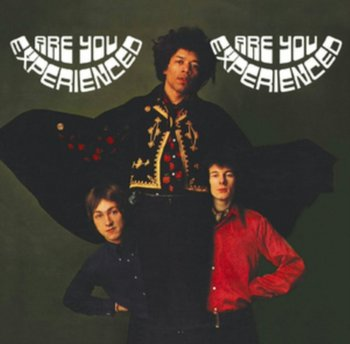

Although in some sports physical caps may not now always be given (whether at all or for each appearance) the term cap for an international or other appearance has been retained as an indicator of the number of occasions on which a sportsperson has represented a team in a particular sport. Thus, a "cap" is awarded for each game played and so a player who has played x games for the team is said to have been capped x times or have won x caps.

Let's first look at the distribution of the number of caps received going into this tournament, using a [***histogram***](https://en.wikipedia.org/wiki/Histogram):

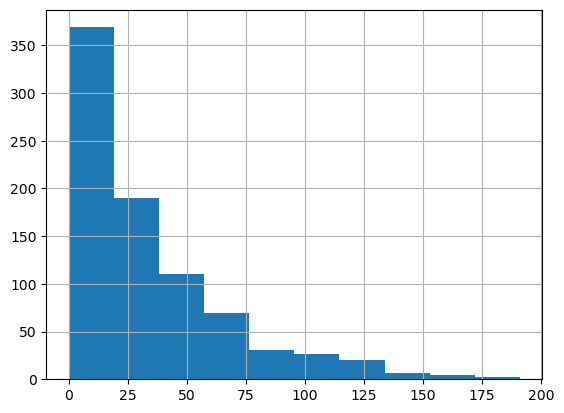

In [18]:
world_cup ['Caps'].hist();

As we can see the majority of players are relatively inexperienced, with less than around 40 appearances, although there are some very experienced players, with over 150 caps. Let's have a look at who they are:

In [19]:
world_cup.loc[world_cup['Caps'] > 150]

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
20,Hassan Al-Haydos,MID,31.00,Qatar,Doha,160,A,Al-Sadd,Qatar,Doha,Home
232,Lionel Messi,FWD,35.00,Argentina,Buenos Aires,165,C,PSG,France,Paris,Away
272,Andres Guardado,MID,36.00,Mexico,Mexico City,180,C,Real Betis,Spain,Madrid,Away
506,Celso Borges,MID,34.00,Costa Rica,San Jose,154,E,Alajuelense,Costa Rica,San Jose,Home
558,Luka Modric,MID,37.00,Croatia,Zagreb,155,F,Real Madrid,Spain,Madrid,Away
733,Diego Godin,DEF,36.00,Uruguay,Montevideo,159,G,Velez Sarsfield,Argentina,Buenos Aires,Away
798,Cristiano Ronaldo,FWD,37.00,Portugal,Lisbon,191,H,Manchester United,England,London,Away


Cristiano Ronaldo is the most capped player at the tournament with 191. The 200 mark is in sight, although at 37 maybe it's time to make way for some new blood?

## Baptism of fire?

<div>
<img src="baptism.jpg" width="300"/>
</div>


The minimum number of caps shown is 0 which means there are players at this tournament who have yet to play for their country - the stage has been set! Let's find out who they are:

In [20]:
world_cup.loc[world_cup['Caps'] == 0]

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
12,Jassim Jabir,MID,20.00,Qatar,Doha,0,A,Al-Arabi,Qatar,Doha,Home
33,William Pacho,DEF,21.00,Ecuador,Quito,0,A,Royal Antwerp,Belgium,Brussels,Away
50,Kevin Rodriguez,FWD,22.00,Ecuador,Quito,0,A,Imbabura SC,Ecuador,Quito,Home
61,Moussa Ndiaye,DEF,20.00,Senegal,Dakar,0,A,Anderlecht,Belgium,Brussels,Away
70,Pathe Ciss,MID,28.00,Senegal,Dakar,0,A,Rayo Vallecano,Spain,Madrid,Away
79,Andries Noppert,GK,28.00,Netherlands,Amsterdam,0,A,Heerenveen,Netherlands,Amsterdam,Home
83,Jeremie Frimpong,DEF,21.00,Netherlands,Amsterdam,0,A,Bayer Leverkusen,Germany,Berlin,Away
92,Xavi Simons,MID,19.00,Netherlands,Amsterdam,0,A,PSV Eindhoven,Netherlands,Amsterdam,Home
234,Nawaf Al-Aqidi,GK,22.00,Saudi Arabia,Riyadh,0,C,Al-Nassr FC,Saudi Arabia,Riyadh,Home
235,Mohamed Al-Yami,GK,25.00,Saudi Arabia,Riyadh,0,C,Al-Ahli Saudi FC,Saudi Arabia,Riyadh,Home


As expected, these players are generally quite young (although Portugal's Jose Sa is 29 - better late than never) or goalkeepers, where the first choice tends to be difficult to oust! Keep an eye out for these names - they might be the stars of the future.

Let's take a look at the average number of caps for each squad:

Text(0.5, 1.0, 'Average number of caps per squad')

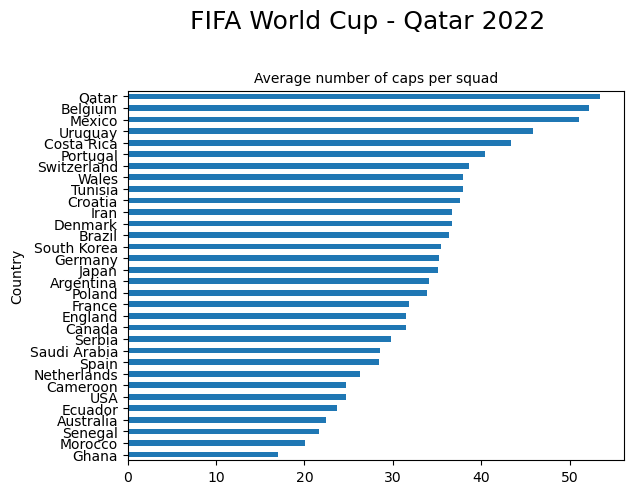

In [21]:
import matplotlib.pyplot as plt

title_string = "FIFA World Cup - Qatar 2022"
subtitle_string = "Average number of caps per squad"

x = world_cup.groupby('Country')['Caps'].mean().sort_values()
plt.figure()
x.plot(kind='barh')
plt.suptitle(title_string, y=1.05, fontsize=18)
plt.title(subtitle_string, fontsize=10)

In [22]:
caps = world_cup.groupby("Country")["Caps"].mean()
caps.sort_values(ascending=False)

Country
Qatar          53.46
Belgium        52.19
Mexico         51.12
Uruguay        45.85
Costa Rica     43.42
Portugal       40.42
Switzerland    38.58
Wales          37.96
Tunisia        37.88
Croatia        37.65
Iran           36.72
Denmark        36.65
Brazil         36.31
South Korea    35.46
Germany        35.19
Japan          35.15
Argentina      34.12
Poland         33.88
France         31.80
England        31.54
Canada         31.46
Serbia         29.77
Saudi Arabia   28.50
Spain          28.42
Netherlands    26.23
Cameroon       24.73
USA            24.69
Ecuador        23.73
Australia      22.42
Senegal        21.62
Morocco        20.04
Ghana          17.00
Name: Caps, dtype: float64

The host nation Quatar have the most experienced squad with an average of 53.46 international apperances per player. The least experienced squad is Ghana, with an average of 17. 

To caveat this, it is worth noting that qualification for the World Cup is segregated by region, and there can be a wide disparity between the number of qualifying matches played. This can result in some nations playing a large number of matches, without necessarily playing in a major tournament, which is perhaps a better indicator of experience. 

## Categorical features

Here's how we get a quick summary of all the non-numeric columns in the dataset:

In [310]:
world_cup.describe(include=[object])

,Name,Position,Country,Ctry_cap,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
count,830,830,830,830,830,830,830,830,830
unique,830,4,32,32,8,446,43,43,2
top,Saad Al-Sheeb,DEF,Qatar,Doha,G,Al-Sadd,England,London,Away
freq,1,274,26,26,130,13,159,159,551


In [23]:
cols = ['Position', 'Group', 'Home_Away']
world_cup[cols] = world_cup[cols].astype('category')

In [24]:
world_cup[['Name','Country','Ctry_cap','Club','Club_ctry','Club_ctry_cap']] = world_cup[['Name','Country','Ctry_cap','Club','Club_ctry','Club_ctry_cap']].astype(str)

## Club v Country

First of all let's look at where these 830 players play their club football:

Text(0.5, 1.0, 'Number of players playing in....')

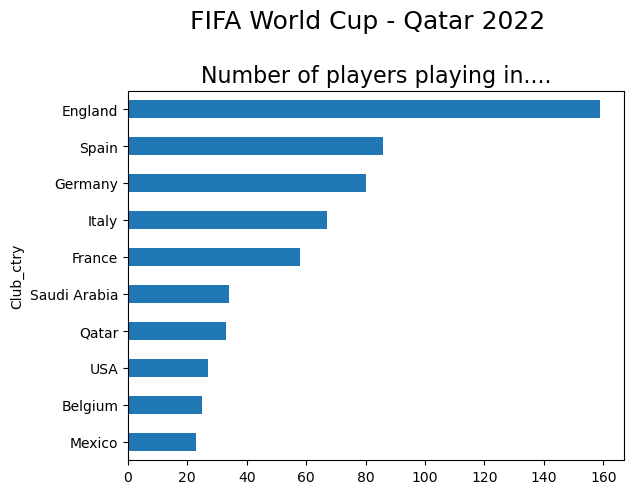

In [25]:
import matplotlib.pyplot as plt

title_string = "FIFA World Cup - Qatar 2022"
subtitle_string = "Number of players playing in...."

x = world_cup.groupby('Club_ctry')['Club'].count().sort_values(ascending=True).tail(10)
plt.figure()
x.plot(kind='barh')
plt.suptitle(title_string, y=1.05, fontsize=18)
plt.title(subtitle_string, fontsize=16)

In [27]:
world_cup.groupby("Club_ctry")["Club"].count().sort_values(ascending=False).head(10)

Club_ctry
England         159
Spain            86
Germany          80
Italy            67
France           58
Saudi Arabia     34
Qatar            33
USA              27
Belgium          25
Mexico           23
Name: Club, dtype: int64

So out of 830 players represented at the World Cup, 159 play their football in England. Let's take a look at the top 10 clubs with the most players playing at this tournament: 

Text(0.5, 1.0, 'Number of players playing for..')

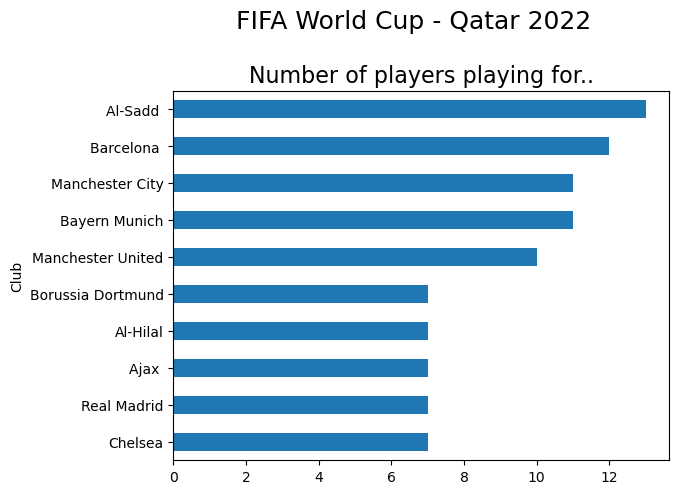

In [28]:
title_string = "FIFA World Cup - Qatar 2022"
subtitle_string = "Number of players playing for.."

x = world_cup.groupby("Club")["Club_ctry"].count().sort_values(ascending=True).tail(10)
plt.figure()
x.plot(kind='barh')
plt.suptitle(title_string, y=1.05, fontsize=18)
plt.title(subtitle_string, fontsize=16)

Al-Sadd, wo play in the Qatar Stars league have 13 players (all playing for Qatar) at the tournament, closely followed by Barcelona with 12, Munich and Manchester City, with 11 and Manchester United having 10. Saudi Arabia's squad all play within Saudi Arabia, 7 of them for Al_Hilal.

## Scotland

<div>
<img src="scotland_flag.jpg" width="300"/>
</div>


Sadly, my country didn't make it, but there are some players who play domestically in Scotland who will be in Qatar representing their country. Let's have a look and see who they are:

In [29]:
scotland = world_cup[world_cup['Club_ctry'] == 'Scotland']
scotland

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
159,Cameron Carter-Vickers,DEF,24.00,USA,"Washington, DC",10,B,Celtic,Scotland,Edinburgh,Away
200,Dylan Levitt,MID,21.00,Wales,Cardiff,13,B,Dundee United,Scotland,Edinburgh,Away
392,Aziz Behich,DEF,31.00,Australia,Canberra,53,D,Dundee United,Scotland,Edinburgh,Away
394,Nathaniel Atkinson,DEF,23.00,Australia,Canberra,5,D,Hearts,Scotland,Edinburgh,Away
397,Kye Rowles,DEF,24.00,Australia,Canberra,3,D,Hearts,Scotland,Edinburgh,Away
400,Aaron Mooy,MID,32.00,Australia,Canberra,53,D,Celtic,Scotland,Edinburgh,Away
403,Keanu Baccus,MID,29.00,Australia,Canberra,53,D,St Mirren,Scotland,Edinburgh,Away
404,Cameron Devlin,MID,24.00,Australia,Canberra,1,D,Hearts,Scotland,Edinburgh,Away
464,Daizen Maeda,FWD,25.00,Japan,Tokyo,8,E,Celtic,Scotland,Edinburgh,Away
548,Borna Barisic,DEF,29.00,Croatia,Zagreb,28,F,Rangers,Scotland,Edinburgh,Away


Interestingly, out of the 12 players who play their club football in Scotland, 6 are Australian. The shared language is probably a contributory factor, certainly not the search for warmer weather.

## Poland

<div>
<img src="poland.jpg" width="200"/>
</div>


Having recently relocated here, at least I now have a team to follow!  Let's have a look at the players who play their club football in Poland:

In [31]:
poland_club = world_cup[world_cup['Club_ctry'] == 'Poland']
poland_club

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
295,Artur Jedrzejczyk,DEF,34.00,Poland,Warsaw,40,C,Legia Warsaw,Poland,Warsaw,Home
297,Michal Skoras,MID,22.00,Poland,Warsaw,1,C,Lech Poznan,Poland,Warsaw,Home
301,Kamil Grosicki,MID,34.00,Poland,Warsaw,87,C,Pogon Szczecin,Poland,Warsaw,Home
706,Filip Mladenovic,DEF,31.00,Serbia,Belgrade,20,G,Legia Warsaw,Poland,Warsaw,Away


Only 4 players, 3 of which are Polish. The lone soldier is Filip Mladenovic of Serbia who plays his club football with Legia Warsaw. Let's have a look at the Poland squad in general:

In [32]:
poland = world_cup[world_cup['Country'] == 'Poland']
poland

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away
285,Wojciech Szczesny,GK,32.00,Poland,Warsaw,66,C,Juventus,Italy,Rome,Away
286,Lukasz Skorupski,GK,31.00,Poland,Warsaw,8,C,Bologna,Italy,Rome,Away
287,Kamil Grabara,GK,23.00,Poland,Warsaw,1,C,Copenhagen,Denmark,Copenhagen,Away
288,Jan Bednarek,DEF,26.00,Poland,Warsaw,45,C,Aston Villa,England,London,Away
289,Kamil Glik,DEF,34.00,Poland,Warsaw,99,C,Benevento,Italy,Rome,Away
290,Matty Cash,DEF,25.00,Poland,Warsaw,7,C,Aston Villa,England,London,Away
291,Jakub Kiwior,DEF,22.00,Poland,Warsaw,3,C,Spezia,Italy,Rome,Away
292,Robert Gumny,DEF,24.00,Poland,Warsaw,5,C,FC Augsburg,Germany,Berlin,Away
293,Bartosz Bereszynski,DEF,30.00,Poland,Warsaw,46,C,Sampdoria,Italy,Rome,Away
294,Mateusz Wieteska,DEF,25.00,Poland,Warsaw,2,C,Clermont,France,Paris,Away


## Home and Away

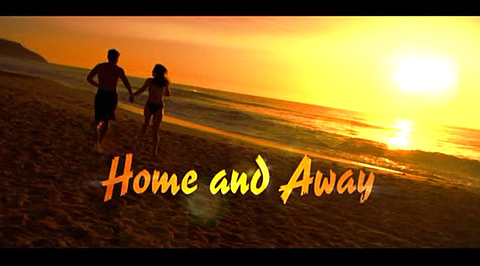

These days players travel far and wide to ply their trade. I wondered what the impact of that might be on the tightness of a squad, and thought it would be interesting to take a closer look at where players play domestically.

Let's take a look at the distribution of where the players play their club football:

In [33]:
world_cup['Home_Away'].value_counts()

Away    551
Home    279
Name: Home_Away, dtype: int64

Most players play their club football outside of their home nation. Let's illustrate that graphically with a bar plot:

<AxesSubplot: ylabel='Country'>

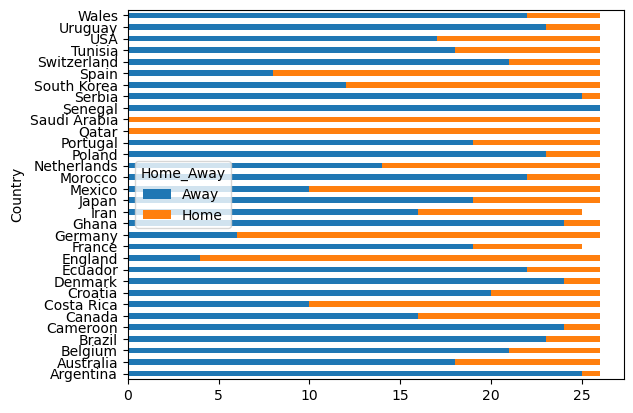

In [36]:
home_away_plot = world_cup.groupby(['Home_Away', 'Country']).size().sort_values(ascending=False).reset_index().pivot(columns='Home_Away', index='Country', values=0)
home_away_plot.plot(kind='barh', stacked=True)

That's quite insightful and re-emphasises that most players do play their club football outside of their home nation, exemplified at the extreme by Senegal, where the entire squad are based outside of Senegal. At the other extreme, all of the Qatar and Saudi Arabia squads are based at home. England are the next 'tightest' squad. Will this contribute to a successful tournament? All will be revealed over the next few weeks!

## Huddle

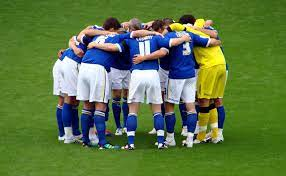

We have already established that the total distance for Saudi Arabia and Qatar is zero (their squads all play club football locally), but let's try to establish just how far flung the other squads are, by calculating the distance for each player from their nation's capital to the capital of the country where they play their club football. 

Apologies for this next section which is not very Pythonic! In hindsight this was probably a tad ambitious for me as someone just starting out, and I ran into all sorts of obstacles, but I got there in the end, and thankfully before the tournament ended! 

### Obtaining co-ordinates using Geopy

We can obtain the co-ordinates of the capital cities of the countries where the players play their club football using the [Geopy library](https://geopy.readthedocs.io/en/stable/) in Python. There is a very useful guide available [here](https://www.geeksforgeeks.org/how-to-get-geolocation-in-python/):

In [37]:
## Install required package
!pip install geopy

# import required module
from geopy.geocoders import Nominatim

In [38]:
countries = ('England', 'Spain', 'Germany', 'Italy', 'France', 'Saudi Arabia', 'Qatar', 'United States', 'Belgium', 'Mexico', 'Turkey', 'Netherlands', 'Portugal', 'Costa Rica', 'South Korea', 'Greece', 'Scotland', 'Japan',             
'Canada', 'Switzerland', 'Iran',  'Denmark',  'Tunisia',  'Australia',  'Croatia' , 'Brazil',  'Argentina',  'Wales', 'Poland',  'Morocco',  'Ecuador', 'Austria', 'Serbia', 'Uruguay',  'Kuwait', 'Russia',  'Ghana', 'Egypt',                                    
'Cyprus', 'China', 'Cameroon', 'Colombia',  'United Arab Emirates', 'Senegal') 

First, we can create a list of capital cities for the above countries, and then create a function to loop through this list, and extract the longitude and latitude for each of the cities:

In [39]:
# List of capitals
capitals = ['London', 'Madrid', 'Berlin', 'Rome', 'Paris', 'Riyadh', 'Doha', 'Washington, DC', 'Brussels', 'Mexico City', 'Ankara', 'Amsterdam', 'Lisbon', 'San Jose', 'Seoul', 'Athens', 'Edinburgh', 'Tokyo', 
'Ottawa', 'Berne', 'Tehran', 'Copenhagen', 'Tunis', 'Canberra', 'Zagreb', 'Brasilia', 'Buenos Aires', 'Cardiff', 'Warsaw', 'Rabat', 'Quito', 'Vienna', 'Belgrade', 'Montevideo', 'Kuwait City', 'Moscow', 'Accra', 'Cairo',
'Nicosia', 'Beijing', 'Yaounde', 'Bogota','Abu Dhabi','Dakar']

geolocator = Nominatim(user_agent="GetLoc")

# loop through list of capitals and return their co-ordinates
for capital in capitals:
    location = geolocator.geocode(capital)
    lat = location.latitude
    long = location.longitude 
    print(lat,long)

51.5073219 -0.1276474
40.4167047 -3.7035825
52.5170365 13.3888599
41.8933203 12.4829321
48.8588897 2.3200410217200766
24.638916 46.7160104
25.2856329 51.5264162
38.8950368 -77.0365427
50.8465573 4.351697
19.4326296 -99.1331785
39.9207886 32.8540482
52.3727598 4.8936041
38.7077507 -9.1365919
37.3361663 -121.890591
37.5666791 126.9782914
37.9839412 23.7283052
55.9533456 -3.1883749
35.6828387 139.7594549
45.4208777 -75.6901106
46.9482713 7.4514512
35.6892523 51.3896004
55.6867243 12.5700724
33.8439408 9.400138
-35.2975906 149.1012676
45.84264135 15.962231476593626
-10.3333333 -53.2
-34.6075682 -58.4370894
51.4816546 -3.1791934
52.2337172 21.071432235636493
34.022405 -6.834543
-0.2201641 -78.5123274
48.2083537 16.3725042
44.8178131 20.4568974
-34.9058916 -56.1913095
29.3796532 47.9734174
55.7504461 37.6174943
5.5571096 -0.2012376
30.0443879 31.2357257
35.1748976 33.3638568
39.906217 116.3912757
3.8689867 11.5213344
4.6534649 -74.0836453
24.4538352 54.3774014
14.693425 -17.447938


Now create a list which combines the capitals and their co-ordinates:

In [40]:
co_ordinates = [["London", 51.5073219, -0.1276474],
['Madrid', 40.4167047, -3.7035825],
['Berlin', 52.5170365, 13.3888599],
['Rome',  41.8933203, 12.4829321],
['Paris', 48.8588897, 2.3200410217200766],
['Riyadh', 24.638916, 46.7160104],
['Doha', 25.2856329, 51.5264162],
['Washington, DC', 38.8950368, -77.0365427],
['Brussels', 50.8465573, 4.351697],
['Mexico City', 19.4326296, -99.1331785],
['Ankara', 39.9207886, 32.8540482],
['Amsterdam', 52.3727598, 4.8936041],
['Lisbon', 38.7077507, -9.1365919],
['San Jose', 37.3361663, -121.890591],
['Seoul', 37.5666791, 126.9782914],
['Athens', 37.9839412, 23.7283052],
['Edinburgh', 55.9533456, -3.1883749],
['Tokyo', 35.6828387, 139.7594549],
['Ottawa', 45.4208777, -75.6901106],
['Berne', 46.9482713, 7.4514512],
['Tehran', 35.6892523, 51.3896004],
['Copenhagen', 55.6867243, 12.5700724],
['Tunis', 33.8439408, 9.400138],
['Canberra', 35.2975906, 149.1012676],
['Zagreb', 45.84264135, 15.962231476593626],
['Brasilia', -10.3333333, -53.2],
['Buenos Aires', -34.6075682, -58.4370894],
['Cardiff', 51.4816546, -3.1791934],
['Warsaw', 52.2337172, 21.071432235636493],
['Rabat', 34.022405, -6.834543],
['Quito', -0.2201641, -78.5123274],
['Vienna', 48.2083537, 16.3725042],
['Belgrade', 44.8178131, 20.4568974],
['Montevideo', -34.9058916, -56.1913095],
['Kuwait City', 29.3796532, 47.9734174],
['Moscow', 55.7504461, 37.6174943],
['Accra', 5.5571096, -0.2012376],
['Cairo', 30.0443879, 31.2357257],
['Nicosia', 35.1748976, 33.3638568],
['Beijing', 39.906217, 116.3912757],
['Yaounde', 3.8689867, 11.5213344],
['Bogota', 4.6534649, -74.0836453],
['Abu Dhabi', 24.4538352, 54.3774014],
['Dakar', 14.693425, -17.447938]]    

And now create separate DataFrames for our 'from' and 'to' destinations:

In [41]:
from_co_ord = pd.DataFrame(co_ordinates,columns=['from', 'from_long', 'from_lat'])
to_co_ord = pd.DataFrame(co_ordinates,columns=['to', 'to_long', 'to_lat'])

In [42]:
from_co_ord.head()

,from,from_long,from_lat
0,London,51.51,-0.13
1,Madrid,40.42,-3.70
2,Berlin,52.52,13.39
3,Rome,41.89,12.48
4,Paris,48.86,2.32


In [43]:
to_co_ord.head()

,to,to_long,to_lat
0,London,51.51,-0.13
1,Madrid,40.42,-3.70
2,Berlin,52.52,13.39
3,Rome,41.89,12.48
4,Paris,48.86,2.32


### Obtaining all possible city pair combinations

We need to find all the possible 'from' : 'to' combinations in order to calculate the distances between the cities. We have 44 cities which gives according to this [handy calculator](https://www.omnicalculator.com/statistics/combination) , 946 pairings without repetitions.

After some digging around I found [this post](https://stackoverflow.com/questions/57277290/looping-through-two-separate-dataframes-haversine-function-store-the-values) on **stackoverflow** which gave a general overview of how this might be achieved. In order to obtain the pairings and index them, we can use the [MultiIndex.from_product](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.from_product.html#pandas.MultiIndex.from_product) pandas class:

In [44]:
idx = pd.MultiIndex.from_product([from_co_ord.index, to_co_ord.index], names=['from', 'to'])

In [45]:
# create a combined DataFrame that joins our from and to DataFrames
# Includes all possible pairings (including duplicates)

from_to = pd.DataFrame(index=idx) \
        .join(from_co_ord[['from','from_lat', 'from_long']], on='from') \
        .join(to_co_ord[['to','to_lat', 'to_long']], on='to')

In [46]:
from_to

from  from_lat  from_long         to  to_lat  to_long
from to                                                         
0    0   London     -0.13      51.51     London   -0.13    51.51
     1   London     -0.13      51.51     Madrid   -3.70    40.42
     2   London     -0.13      51.51     Berlin   13.39    52.52
     3   London     -0.13      51.51       Rome   12.48    41.89
     4   London     -0.13      51.51      Paris    2.32    48.86
...         ...       ...        ...        ...     ...      ...
43   39   Dakar    -17.45      14.69    Beijing  116.39    39.91
     40   Dakar    -17.45      14.69    Yaounde   11.52     3.87
     41   Dakar    -17.45      14.69     Bogota  -74.08     4.65
     42   Dakar    -17.45      14.69  Abu Dhabi   54.38    24.45
     43   Dakar    -17.45      14.69      Dakar  -17.45    14.69

[1936 rows x 6 columns]

That's not quite as concise as we would like - we have 1936 pairings. That's because ***MultiIndex.from_prodcut*** has returned values for London to London, Dakar to Dakar, etc. We also have London to Madrid, and Madrid to London which is also duplication. Let's move forward.

### Going the extra mile

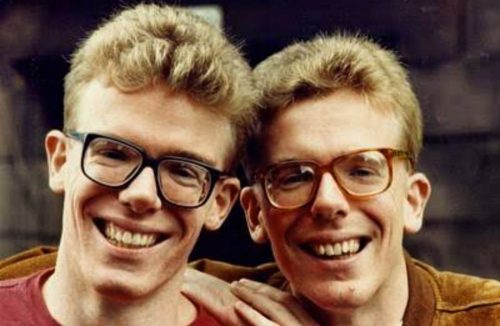

We can calculate the distance between two locations using [Haversine](https://pypi.org/project/haversine/). Let's create a function that allows us to return values for all our pairings:

In [47]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    miles = km * 0.621371
    return miles

# Add a new column to our from_to DataFrame to include the distance calculations
from_to['Distance_miles'] = haversine_np(*from_to[['from_lat', 'from_long', 'to_lat', 'to_long']].values.T)

Let's take a look at our completed distances DataFrame:

In [48]:
from_to

from  from_lat  from_long         to  to_lat  to_long  \
from to                                                            
0    0   London     -0.13      51.51     London   -0.13    51.51   
     1   London     -0.13      51.51     Madrid   -3.70    40.42   
     2   London     -0.13      51.51     Berlin   13.39    52.52   
     3   London     -0.13      51.51       Rome   12.48    41.89   
     4   London     -0.13      51.51      Paris    2.32    48.86   
...         ...       ...        ...        ...     ...      ...   
43   39   Dakar    -17.45      14.69    Beijing  116.39    39.91   
     40   Dakar    -17.45      14.69    Yaounde   11.52     3.87   
     41   Dakar    -17.45      14.69     Bogota  -74.08     4.65   
     42   Dakar    -17.45      14.69  Abu Dhabi   54.38    24.45   
     43   Dakar    -17.45      14.69      Dakar  -17.45    14.69   

         Distance_miles  
from to                  
0    0             0.00  
     1           784.56  
     2           577.80  
     3           890.44  
     4           212.47  
...                 ...  
43   39         7634.29  
     40         2107.38  
     41         3906.72  
     42         4673.86  
     43            0.00  

[1936 rows x 7 columns]

## V look up in Python

We now want to include the distance figures in our orginal world_cup DataFrame to allow us to calculate the total distance per squad, which will give us some sort of comaprison of the 'closeness' of the 32 teams. I am familiar with this feature in Excel but you can do the same thing in Python. Here is a [useful article](https://www.geeksforgeeks.org/how-to-do-a-vlookup-in-python-using-pandas/) on how to do it. 

Let's first get our DataFrames tee'd up by adding a common column for joining on:

In [49]:
from_to["from_to"] = from_to['from'] + " to " + from_to['to']
from_to

from  from_lat  from_long         to  to_lat  to_long  \
from to                                                            
0    0   London     -0.13      51.51     London   -0.13    51.51   
     1   London     -0.13      51.51     Madrid   -3.70    40.42   
     2   London     -0.13      51.51     Berlin   13.39    52.52   
     3   London     -0.13      51.51       Rome   12.48    41.89   
     4   London     -0.13      51.51      Paris    2.32    48.86   
...         ...       ...        ...        ...     ...      ...   
43   39   Dakar    -17.45      14.69    Beijing  116.39    39.91   
     40   Dakar    -17.45      14.69    Yaounde   11.52     3.87   
     41   Dakar    -17.45      14.69     Bogota  -74.08     4.65   
     42   Dakar    -17.45      14.69  Abu Dhabi   54.38    24.45   
     43   Dakar    -17.45      14.69      Dakar  -17.45    14.69   

         Distance_miles             from_to  
from to                                      
0    0             0.00    London to London  
     1           784.56    London to Madrid  
     2           577.80    London to Berlin  
     3           890.44      London to Rome  
     4           212.47     London to Paris  
...                 ...                 ...  
43   39         7634.29    Dakar to Beijing  
     40         2107.38    Dakar to Yaounde  
     41         3906.72     Dakar to Bogota  
     42         4673.86  Dakar to Abu Dhabi  
     43            0.00      Dakar to Dakar  

[1936 rows x 8 columns]

In [50]:
world_cup["from_to"] = world_cup['Ctry_cap'] + " to " + world_cup['Club_ctry_cap']
world_cup

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away,from_to
0,Saad Al-Sheeb,GK,32.00,Qatar,Doha,80,A,Al-Sadd,Qatar,Doha,Home,Doha to Doha
1,Meshaal Barsham,GK,24.00,Qatar,Doha,15,A,Al-Sadd,Qatar,Doha,Home,Doha to Doha
2,Yousuf Hassan,GK,26.00,Qatar,Doha,9,A,Al-Gharafa,Qatar,Doha,Home,Doha to Doha
3,Pedro Miguel,DEF,32.00,Qatar,Doha,78,A,Al-Sadd,Qatar,Doha,Home,Doha to Doha
4,Musaab Khidir,DEF,29.00,Qatar,Doha,29,A,Al-Sadd,Qatar,Doha,Home,Doha to Doha
...,...,...,...,...,...,...,...,...,...,...,...,...
825,Kamaldeen Sulemana,MID,20.00,Ghana,Accra,11,H,Stade Rennes,France,Paris,Away,Accra to Paris
826,Antoine Semenyo,FWD,22.00,Ghana,Accra,1,H,Bristol City,England,London,Away,Accra to London
827,Andre Ayew,FWD,32.00,Ghana,Accra,107,H,Al Sadd,Qatar,Doha,Away,Accra to Doha
828,Jordan Ayew,FWD,31.00,Ghana,Accra,82,H,Crystal Palace,England,London,Away,Accra to London


Finally we can join our two DataFrames together which will give us a distance column and value for each player in the tournament:

In [51]:
inner_join = pd.merge(world_cup, from_to, on='from_to',how='inner')

In [52]:
inner_join

,Name,Position,Age,Country,Ctry_cap,Caps,Group,Club,Club_ctry,Club_ctry_cap,Home_Away,from_to,from,from_lat,from_long,to,to_lat,to_long,Distance_miles
0,Saad Al-Sheeb,GK,32.00,Qatar,Doha,80,A,Al-Sadd,Qatar,Doha,Home,Doha to Doha,Doha,51.53,25.29,Doha,51.53,25.29,0.00
1,Meshaal Barsham,GK,24.00,Qatar,Doha,15,A,Al-Sadd,Qatar,Doha,Home,Doha to Doha,Doha,51.53,25.29,Doha,51.53,25.29,0.00
2,Yousuf Hassan,GK,26.00,Qatar,Doha,9,A,Al-Gharafa,Qatar,Doha,Home,Doha to Doha,Doha,51.53,25.29,Doha,51.53,25.29,0.00
3,Pedro Miguel,DEF,32.00,Qatar,Doha,78,A,Al-Sadd,Qatar,Doha,Home,Doha to Doha,Doha,51.53,25.29,Doha,51.53,25.29,0.00
4,Musaab Khidir,DEF,29.00,Qatar,Doha,29,A,Al-Sadd,Qatar,Doha,Home,Doha to Doha,Doha,51.53,25.29,Doha,51.53,25.29,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805,Mohammed Kudus,MID,22.00,Ghana,Accra,16,H,Ajax,Netherlands,Amsterdam,Away,Accra to Amsterdam,Accra,-0.20,5.56,Amsterdam,4.89,52.37,3245.62
806,Daniel Kofi-Kyereh,MID,26.00,Ghana,Accra,12,H,Freiburg,Germany,Berlin,Away,Accra to Berlin,Accra,-0.20,5.56,Berlin,13.39,52.52,3333.41
807,Fatawu Issahaku,MID,18.00,Ghana,Accra,11,H,Sporting,Portugal,Lisbon,Away,Accra to Lisbon,Accra,-0.20,5.56,Lisbon,-9.14,38.71,2356.37
808,Osman Bukari,MID,23.00,Ghana,Accra,5,H,Red Star Belgrade,Serbia,Belgrade,Away,Accra to Belgrade,Accra,-0.20,5.56,Belgrade,20.46,44.82,2983.47


Text(0.5, 1.0, 'Total miles travelled by squad - from their club country capital to their nation capital')

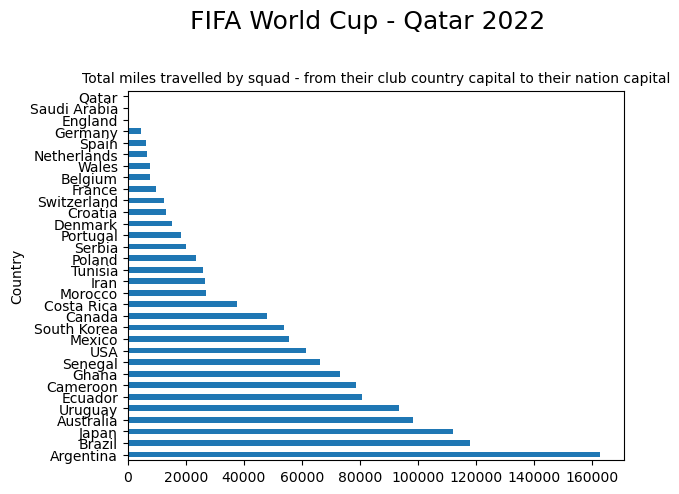

In [53]:
title_string = "FIFA World Cup - Qatar 2022"
subtitle_string = "Total miles travelled by squad - from their club country capital to their nation capital"

x = inner_join.groupby('Country')['Distance_miles'].sum().sort_values(ascending=False)
plt.figure()
x.plot(kind='barh')
plt.suptitle(title_string, y=1.05, fontsize=18)
plt.title(subtitle_string, fontsize=10)

In [54]:
inner_join.groupby("Country")["Distance_miles"].sum().sort_values(ascending=True)

Country
Saudi Arabia        0.00
Qatar               0.00
England           577.80
Germany          4631.29
Spain            6389.33
Netherlands      6658.89
Wales            7674.01
Belgium          7824.11
France           9663.44
Switzerland     12648.83
Croatia         13322.72
Denmark         15194.21
Portugal        18366.13
Serbia          19948.33
Poland          23557.92
Tunisia         25922.17
Iran            26752.28
Morocco         27042.30
Costa Rica      37651.80
Canada          47922.17
South Korea     53858.03
Mexico          55687.73
USA             61448.54
Senegal         66198.44
Ghana           73052.50
Cameroon        78656.09
Ecuador         80700.85
Uruguay         93702.58
Australia       98441.33
Japan          112062.53
Brazil         118045.02
Argentina      162925.56
Name: Distance_miles, dtype: float64

## Full time

<div>
<img src="final_whistle.jpg" width="300"/>
</div>


Home advantage often counts. If you recall South Korea reached the semi final when they hosted the tournament back in 2002, and if you look back even further to 1966 then... Let's end that there. 

Will this togetherness give Qatar an advantage? Time will tell. They also have the 'tightest' squad (along with Saudi Arabia) in terms of the fact that all of their players play their club football at home. Outside of those two, England are the 'closest' squad, with only Jude Bellingham (Borussia Dortmund) playing his club football outside of England.

The Argentina squad are the most scattered, followed by Brazil, Argentina, and Japan. This makes sense, as most of their squads play in Europe, which is a long way from home!

## Key take-aways

This has been a rewarding project overall for me. I achieved what I set out to do, which began with a vague idea of the 'tightness' of the World Cup squads, and how I might quantify this, perhaps by looking at where the players play their club football, and how far they would have to travel to begin preparations back in their home nation.

There were many obstacles along the way, the main one was working out how to calculate the distance between two points, and this gave me a first introduction to working with geospatial data, including the [Geopy library](https://geopy.readthedocs.io/en/stable/) and [Haversine](https://pypi.org/project/haversine/). I also managed to create one or two functions to automate the extraction of co-ordinate data and distance calculations and found about one of the more advanced panda classes, [MultiIndex.from_product](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.from_product.html#pandas.MultiIndex.from_product).

I was familiar with the [VLOOKUP fuction](https://support.microsoft.com/en-us/office/vlookup-function-0bbc8083-26fe-4963-8ab8-93a18ad188a1) in Excel, and the various [join clauses](https://en.wikipedia.org/wiki/Join_(SQL)) in SQL, but I now know how to achieve the same end result using pandas [merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

I'm looking forward to seeing how this Tournament unfolds - may the best team win!